In [15]:
import os, sys
import importlib
from scipy import ndimage
import cv2
import medmnist
import numpy as np
import pandas as pd
import torch.utils.data as data
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from tqdm import tqdm
from medmnist import INFO, Evaluator

## Load pathmnist 

In [3]:
data_flag = 'pathmnist'
download = True
BATCH_SIZE = 16
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

In [1]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])
train_dataset = DataClass(split='train', transform=data_transform, download=download)

NameError: name 'transforms' is not defined

In [5]:
train_loader = data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [6]:
sample, label = next(iter(train_loader))
sample.shape

torch.Size([16, 3, 28, 28])

In [7]:
train_dataset.montage(length=1)

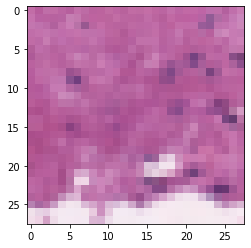

In [8]:
# img = cv2.merge((sample[0, 0], sample[0, 1], sample[0, 2]))
plt.imshow(np.transpose(sample[2], (1,2,0)))

In [10]:
channels, fill_val = 3, 25
n_patches, n_diag, patch_size = 2, 5, 28
img_size = n_patches * n_diag * patch_size
step_size = n_patches * patch_size

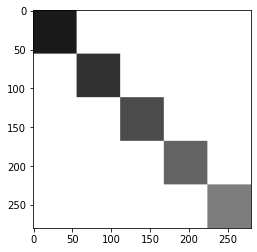

In [11]:
mock_image = np.full(shape=(channels, img_size, img_size), fill_value=255)
for i in range(n_diag):
    mock_image[:, step_size * i:step_size * (i+1), step_size * i:step_size * (i+1)] = fill_val * (i+1)
plt.imshow(np.transpose(mock_image, (1,2,0)))

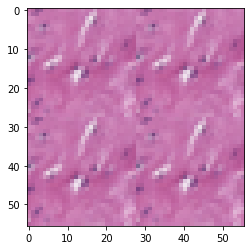

In [115]:
plt.imshow(np.transpose(np.tile(sample[2], (2, 2)), (1,2,0)))

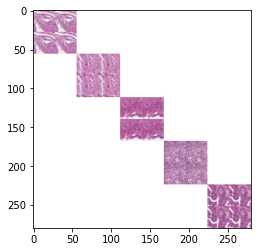

In [53]:
mock_image = np.full(shape=(channels, img_size, img_size), fill_value=1, dtype=np.float32)
for i in range(n_diag):
    mock_image[:, step_size * i:step_size * (i+1), step_size * i:step_size * (i+1)] = np.tile(sample[i], (2, 2))
plt.imshow(np.transpose(mock_image, (1,2,0)))

## Save mock as tiff file

### Test with pylibtiff

In [20]:
from libtiff import TIFFfile, TIFFimage, TIFF
from scipy import ndimage

In [21]:
ndimage.zoom(mock_image, (1, 2, 2)).shape

(3, 560, 560)

In [13]:
data = [mock_image, ndimage.zoom(mock_image, (1, 2, 2))]

In [36]:
tiff = TIFFimage(mock_image, description="")
tiff.write_file('mock2.tiff', compression='lzw') # or 'lzw'

Writing TIFF records to mock2.tiff
  filling records:   100% done (8Mi+71Ki+160 bytes/s)    
  resized records: 1Mi+815Ki+819 bytes -> 224Ki+353 bytes (compression: 8.28x)


8.275352502924697

In [37]:
mock_image.shape

(3, 280, 280)

In [38]:
tif = TIFFfile('mock.tiff')
samples, sample_names = tif.get_samples()

In [39]:
len(samples)

1

In [40]:
samples[0].shape

(3, 280, 280)

In [41]:
sample_names

['sample0']

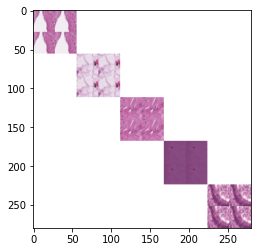

In [42]:
plt.imshow(np.transpose(samples[0], (1,2,0)))

In [161]:
dt = np.dtype(dict(names=list('rgb'), formats=[np.uint8]*3))
image = np.zeros((2, 3), dtype=dt)
image['r'][:, 0] = 250
image['g'][:, 1] = 251
image['b'][:, 2] = 252

In [163]:
arr = np.zeros((5, 6, 4), np.uint8)
for i in np.ndindex(*arr.shape):
    arr[i] = 20 * i[0] + 10 * i[1] + i[2]
print(arr.shape)

(5, 6, 4)


### Test with Tiffile package

In [38]:
from tifffile import imwrite, imread, TiffWriter
serie1 = np.transpose(mock_image, (1, 2, 0)).astype('float32')
serie2 = ndimage.zoom(serie1, (1.1, 1.1, 1)).astype('float32')
serie3 = ndimage.zoom(serie2, (1.2, 1.2, 1)).astype('float32')

In [39]:
imwrite('mock.tiff', serie1, photometric='rgb', bigtiff=True, compression="zlib")
imwrite('mock.tiff', serie2, photometric='rgb', append=True, bigtiff=True, compression="zlib")
imwrite('mock.tiff', serie3, photometric='rgb', append=True, bigtiff=True, compression="zlib")

In [48]:
for i in range(3):
    image = imread('mock.tiff', series=i)
    print(image.shape)

(280, 280, 3)
(308, 308, 3)
(370, 370, 3)


In [52]:
1.2*28

33.6

## PANDA TEST

(3, 280, 280)

In [49]:
tif = TIFFfile('t2.tiff', )
samples, sample_names = tif.get_samples()

ValueError: wrong magic number for TIFF file: 43